In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ushape.csv')

In [3]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [4]:
df['X'] = df['3.159499363321345566e-02'].rename('X')

In [5]:
df['Y'] = df['9.869877579082642072e-01'].rename('Y')

In [6]:
df['class'] = df['0.000000000000000000e+00'].rename('class')

In [7]:
df.drop(columns=['9.869877579082642072e-01','0.000000000000000000e+00','3.159499363321345566e-02'],axis=1,inplace=True)

In [8]:
df.head()

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


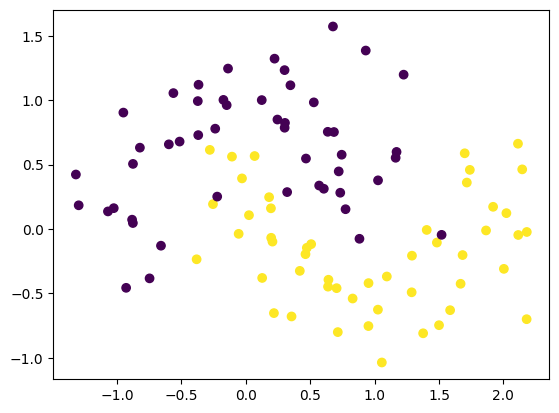

In [9]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [10]:
X = df.drop(columns=['class'],axis=1)
y = df['class']

In [11]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense

2025-05-23 17:45:19.874632: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748022319.886282   27803 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748022319.889736   27803 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748022319.900009   27803 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748022319.900024   27803 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748022319.900025   27803 computation_placer.cc:177] computation placer alr

In [12]:
# model = Sequential()
# model.add(Dense(10,activation='tanh',input_dim=2,kernel_initializer='glorot_normal'))
# model.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
# model.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
# model.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
# model.add(Dense(1,activation='sigmoid'))

model = Sequential()
model.add(Dense(10,activation='tanh',input_dim=2,kernel_initializer='glorot_uniform'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorot_uniform'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorot_uniform'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorot_uniform'))
model.add(Dense(1,activation='sigmoid'))

/home/zahir/Tf_gpu/tfgpu1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1748022321.697787   27803 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2050, pci bus id: 0000:01:00.0, compute capability: 8.6


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.get_weights()

[array([[ 0.09368956, -0.2315551 , -0.7006539 , -0.36993453,  0.5104602 ,
          0.65361875,  0.00998861, -0.08417481,  0.58139473, -0.55653274],
        [ 0.53645986, -0.06596535,  0.5735021 , -0.554376  , -0.27490652,
         -0.35111982, -0.47436497, -0.14993203,  0.4421491 , -0.04744065]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.28256428, -0.4596194 , -0.01489729,  0.04374945,  0.13830143,
          0.02222437, -0.5016526 , -0.19324991,  0.22004318, -0.401652  ],
        [ 0.03698534,  0.43151575,  0.23222971, -0.11962849,  0.14057678,
         -0.29780668,  0.37661374, -0.36859593, -0.08014256,  0.3525743 ],
        [ 0.17812335, -0.34943014, -0.48991123,  0.08006632, -0.10234553,
         -0.52757883,  0.1706872 , -0.29208827,  0.46471667, -0.42959884],
        [-0.4017853 , -0.37589562,  0.00586754,  0.08009112, -0.23740655,
          0.1626041 , -0.12130979,  0.46219456,  0.34494072,  0.5331112 ],
        [-0.20203

In [15]:
initial_weights = model.get_weights()

In [16]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [17]:
model.set_weights(initial_weights)

In [18]:
model.get_weights()

[array([[ 0.42351493,  0.71763027,  1.4015733 ,  0.18971458,  0.29728758,
         -1.1052272 , -0.14049233,  0.08987904,  0.8197062 ,  0.19910666],
        [-0.43057543,  0.15752092, -0.5501943 , -0.10451689, -0.74344766,
         -0.4858804 ,  0.33024982, -0.4127765 ,  0.62631106, -0.00310143]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.27109182, -0.30627525, -0.04026283,  0.03706564, -0.3560615 ,
         -0.23901057,  0.07447042, -0.5514721 ,  0.21319832, -0.13929795],
        [-0.33276924,  0.36536232, -0.4242089 , -0.07823668,  0.33039308,
         -0.1351614 ,  0.26760504,  0.38049722, -0.16713281, -0.09181792],
        [ 0.34858215, -0.46425495, -0.49104834, -0.7662304 , -0.24710739,
          0.00417854,  0.17024375, -0.09175581,  0.36038077,  0.24580204],
        [ 0.1344761 , -0.0926929 ,  0.32117665, -0.1164939 , -0.14196981,
         -0.3822285 ,  0.2694257 , -0.13067971,  0.10795337,  0.10403924],
        [ 0.35655

In [19]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100


I0000 00:00:1748022323.223069   27871 service.cc:152] XLA service 0x7fb138003bc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748022323.223099   27871 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 2050, Compute Capability 8.6
2025-05-23 17:45:23.244710: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1748022323.401700   27871 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/3 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.2500 - loss: 0.7086

I0000 00:00:1748022324.085175   27871 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 691ms/step - accuracy: 0.2579 - loss: 0.7099 - val_accuracy: 0.2000 - val_loss: 0.7059
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3915 - loss: 0.7010 - val_accuracy: 0.5500 - val_loss: 0.6933
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4764 - loss: 0.6927 - val_accuracy: 0.7500 - val_loss: 0.6809
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5534 - loss: 0.6834 - val_accuracy: 0.8000 - val_loss: 0.6692
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6479 - loss: 0.6772 - val_accuracy: 0.8500 - val_loss: 0.6583
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6997 - loss: 0.6688 - val_accuracy: 0.8500 - val_loss: 0.6471
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7153 - loss: 0.6570 - val_accuracy: 0.8500 - val_loss: 0.6359
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6928 - loss: 0.6565 - val_accuracy: 0.8500 - val_loss: 0.6255
Epo

In [21]:
model.get_weights()

[array([[ 0.43895668,  0.77573586,  1.2141361 ,  0.2739754 ,  0.3880278 ,
         -1.1961224 , -0.2206576 ,  0.23868378,  0.8539482 ,  0.23342128],
        [-0.55665773,  0.09324461, -0.65819323, -0.25482097, -0.7730189 ,
         -0.5830932 ,  0.4125369 , -0.4530431 ,  0.73709446, -0.1361841 ]],
       dtype=float32),
 array([-0.03133192,  0.02848324,  0.10185623, -0.08658738, -0.02240261,
         0.21031676, -0.00548251,  0.02975678, -0.11656457, -0.0790268 ],
       dtype=float32),
 array([[ 1.97176307e-01, -4.52199101e-01, -9.57139358e-02,
         -8.24059770e-02, -5.11105061e-01, -3.59439641e-01,
          2.06773594e-01, -5.44985235e-01,  2.66393274e-01,
         -1.64239019e-01],
        [-3.85816753e-01,  2.61626124e-01, -3.52778733e-01,
         -4.27961089e-02,  2.23160535e-01, -8.72134790e-02,
          2.42854372e-01,  5.61093330e-01, -1.27042860e-01,
         -2.20985621e-01],
        [ 2.79352129e-01, -5.41079760e-01, -5.07465422e-01,
         -7.54057646e-01, -3.24827

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 967us/step


<Axes: >

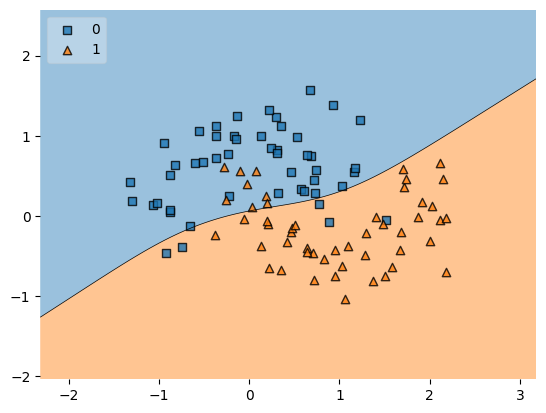

In [22]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X.values, y=y.values.astype(int), clf=model, legend=2)